<b>Author:</b> Brian Erichsen Fagundes
<b>Summer - 2024
UofU Masters in Software Development
Homework 5 - Classifiers

Part 1 - MNIST handwritten digits</b>

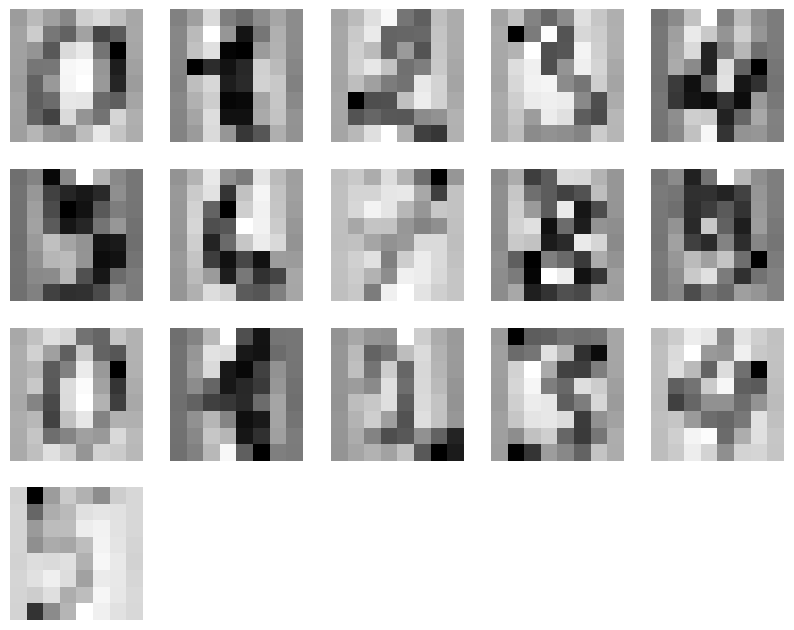

In [12]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np


# load the dataset
digits = load_digits()
# scale the data
x = scale(digits.data)
y = digits.target

# plot some images
plt.figure(figsize=(10, 10))
for i in np.arange(16):
    # nrows ncols, index to retrieve axis
    plt.subplot(5, 5, i + 1)
    ##displays data in 2D - x -data, cmap colormap, which interpolation method
    plt.imshow(np.reshape(x[i,:], (8,8)), cmap = 'Greys', interpolation='nearest')
    plt.axis('off')
# renders image of data
plt.show()

SVM Accuracy: 0.9755


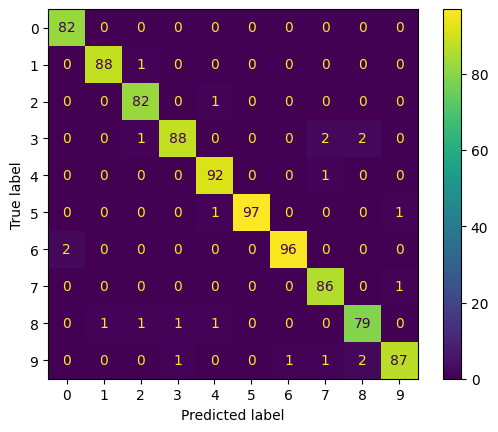

In [13]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# splits the data into training and testing sets --0.5 for half of data points
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

# Uses Support Vector Machoines - optimal hyperplane
# Evaluates the accuracy of the model
# rbf kernel relies on Euclidean distance between data points
model_classifier = SVC(kernel='rbf', C=100)
model_classifier.fit(x_train, y_train)
y_pred_svm = model_classifier.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.4f}') # shows accuracy from model
# computes confusion matrix
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix_svm)
disp.plot()
plt.show()

Most common misclassified digits: 
Digit 1: 1 missclassifications
Digit 7: 1 missclassifications
Digit 3: 5 missclassifications
Digit 9: 5 missclassifications
Digit 6: 2 missclassifications
Digit 8: 4 missclassifications
Digit 5: 2 missclassifications
Digit 2: 1 missclassifications
Digit 4: 1 missclassifications


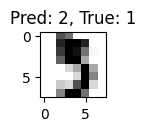

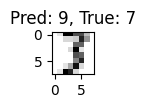

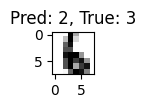

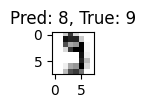

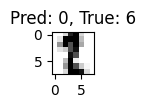

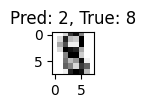

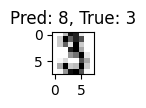

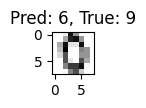

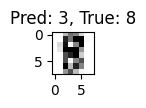

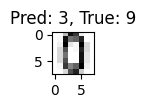

In [14]:
from collections import Counter
# Lets identify and plot most common misclassified digits
# numpy.where (condifition [x,y])
missclassified_indices = np.where(y_pred_svm != y_test)[0]
most_common_digit = missclassified_indices[:10] #first ten
misclassified_count = Counter(y_test[missclassified_indices])
print('Most common misclassified digits: ')
for digit, count in misclassified_count.items():
    print(f'Digit {digit}: {count} missclassifications')


plt.figure(figsize=(10, 4))
for index, mis_index in enumerate(most_common_digit):
    plt.subplot(1, 10, index + 1)
    plt.imshow(digits.images[mis_index], cmap='Greys', interpolation='nearest')
    plt.title(f'Pred: {y_pred_svm[mis_index]}, True: {y_test[mis_index]}')
    plt.show()


The most commom mistake that the classifier seems to be making on my data is missclassifying to a different digit when the true digit is 9 and 3; each one with 5 missclassifications from all missclassifications.

In [15]:
# Using cross validation let's find the best value for C
C_values = (1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 300, 500)
# cv int splits into train and test, default is 5
cross_val_scores = [cross_val_score(SVC(kernel='rbf', C=C), x, y, cv=5).mean() for C in C_values]
best_C = C_values[np.argmax(cross_val_scores)]
print(f'Best C Value from tested numbers is: {best_C}')

Best C Value from tested numbers is: 3


In [16]:
# Train data on raw data (non-scaled) and see accuracy score
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)
svm_raw = SVC(kernel='rbf', C= best_C)
svm_raw.fit(x_train_raw, y_train_raw)
y_pred_svm_raw = svm_raw.predict(x_test_raw)
accuracy_svm_raw = accuracy_score(y_test_raw, y_pred_svm_raw)
print(f'SVM Accuracy on raw data (non-scaled): {accuracy_svm_raw:.4f}')

SVM Accuracy on raw data (non-scaled): 0.9844


- Beguinning of Classification experiments using KNN algorithm instead of Support Vector Machines

KNN Accuracy: 0.9499


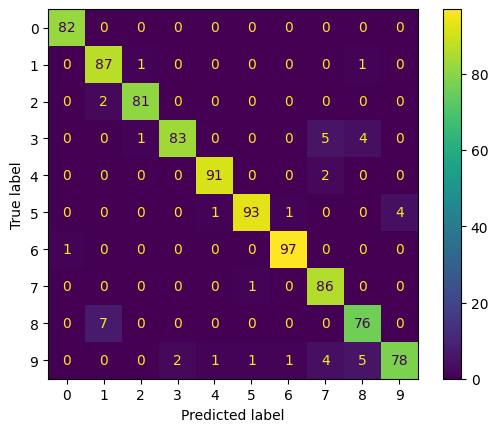

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# KNN Classifier Experiments
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(x_train, y_train)

# Evaluates the accuracy of the model
y_pred_knn = knn_clf.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.4f}')

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
display_cm_knn = ConfusionMatrixDisplay(conf_matrix_knn)
display_cm_knn.plot()
plt.show()

Most common misclassified digits for KNN: 
Digit 5: 6 missclassifications
Digit 7: 1 missclassifications
Digit 3: 10 missclassifications
Digit 9: 14 missclassifications
Digit 2: 2 missclassifications
Digit 8: 7 missclassifications
Digit 6: 1 missclassifications
Digit 1: 2 missclassifications
Digit 4: 2 missclassifications


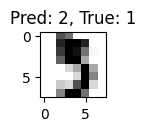

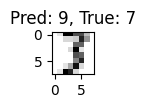

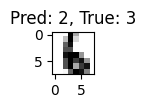

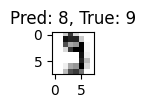

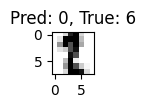

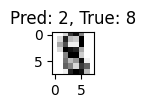

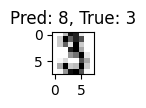

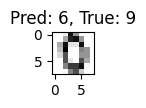

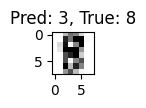

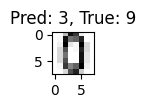

In [18]:
# Lets identify and plot most common misclassified digits
# numpy.where (condifition [x,y])
missclassified_indices_knn = np.where(y_pred_knn != y_test)[0]
most_common_digit_knn = missclassified_indices_knn[:10] #first ten
misclassified_count_knn = Counter(y_test[missclassified_indices_knn])
print('Most common misclassified digits for KNN: ')
for digit, count in misclassified_count_knn.items():
    print(f'Digit {digit}: {count} missclassifications')


plt.figure(figsize=(10, 4))
for index, mis_index in enumerate(most_common_digit):
    plt.subplot(1, 10, index + 1)
    plt.imshow(digits.images[mis_index], cmap='Greys', interpolation='nearest')
    plt.title(f'Pred: {y_pred_svm[mis_index]}, True: {y_test[mis_index]}')
    plt.show()

The digits 9 and 3 still the most digits being misclassfieds but using KNN supervised learning for classification. 

In [19]:
# Using cross validation let's find the best value for k
K_values = range(1, 51)
# cv int splits into train and test, default is 5
cross_val_scores_knn = [cross_val_score(KNeighborsClassifier(n_neighbors=k), x, y, cv=5).mean() for k in K_values]
best_K = C_values[np.argmax(cross_val_scores)]
print(f'Best K Value from tested numbers is: {best_K}')

Best K Value from tested numbers is: 3


In [20]:
# Train data on raw data (non-scaled) and see accuracy score
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)
knn_raw = KNeighborsClassifier(n_neighbors=best_K)
knn_raw.fit(x_train_raw, y_train_raw)
y_pred_knn_raw = knn_raw.predict(x_test_raw)
accuracy_knn_raw = accuracy_score(y_test_raw, y_pred_knn_raw)
print(f'KNN Accuracy on raw data (non-scaled): {accuracy_svm_raw:.4f}')

KNN Accuracy on raw data (non-scaled): 0.9844


<b> Part 2: Online News Dataset</b>

In [21]:
import pandas as pd
# Exploratory data analysis

# import and process data
data = pd.read_csv('OnlineNewsPopularity.csv')
# axis 1 for column
data = data.drop(['url', ' timedelta'], axis=1)

median_shares = data[' shares'].median()
# binary numpy array that tells whether or not article is popular
y = np.where(data[' shares'].to_numpy() > median_shares, 1, 0)

# '.values' returns numpy representation of the data
x = data.drop([' shares'], axis=1).values

# lets check the min, median, max number of shares
min_shares = data[' shares'].values.min()
max_shares = data[' shares'].values.max()
print(f'Min shares: {min_shares}')
print(f'Median shares: {median_shares}')
print(f'Max shares: {max_shares}')

Min shares: 1
Median shares: 1400.0
Max shares: 843300


<b>Classification using KNN</b>

In [23]:
# Split the data into training and testing
# choosing 80/20 split since the data is large so we have enough to train from
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# KNN classifier model
knn = KNeighborsClassifier()
# from 1 to 51 for testing different k values
grid_knn_values = {'n_neighbors': np.arange(1, 51)}
# Grid Search Cross Validation takes estimator, param as dictionary with key, cv # of folds
grid_knn = GridSearchCV(knn, grid_knn_values, cv=5)
grid_knn.fit(x_train, y_train)
best_k = grid_knn.best_params_['n_neighbors']
print(f'Best k for KNN: {best_k}')

# Measures accuracy of model
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train, y_train)
y_pred_knn = knn_best.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.4f}')

Best k for KNN: 37
KNN Accuracy: 0.5897


<b>SVM Classification</b>

In [25]:
# SVM Classifier
svm = SVC()
grid_svm_values = {'C': np.linspace(1, 500, 10)}
grid_svm = GridSearchCV(svm, grid_svm_values, cv=5)
# using only the first 5000 articles
grid_svm.fit(x_train[:5000], y_train[:5000])
best_c = grid_svm.best_params_['C']
print(f'Best C for SVM: {best_c}')
# computes accuracy of model using best C
svm_best = SVC(C=best_c)
svm_best.fit(x_train, y_train)
y_pred_svm = svm_best.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.4f}')

Best C for SVM: 500.0
SVM Accuracy: 0.6110


<b>Decision Tree Classification</b>

In [27]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier
tree = DecisionTreeClassifier()
grid_tree_values = {'max_depth': np.arange(1, 21), 'min_samples_split': np.arange(2, 21)}
grid_tree = GridSearchCV(tree, grid_tree_values, cv=5)
grid_tree.fit(x_train[:5000], y_train[:5000])
best_param_tree = grid_tree.best_params_
print(f'Best parameters for Decision Tree: {best_param_tree}')
# builds new model based on best depth and samples to split
tree_best = DecisionTreeClassifier(**best_param_tree)
tree_best.fit(x_train, y_train)
y_pred_tree = tree_best.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree}')

Best parameters for Decision Tree: {'max_depth': 8, 'min_samples_split': 2}
Decision Tree Accuracy: 0.6428301172909573



Summary of Findings:
KNN best k: 37, Accuracy: 0.5897
SVM best C: 500.0, Accuracy: 0.6110
Decision Tree best parameters: {'max_depth': 8, 'min_samples_split': 2}, Accuracy: 0.6428

Confusion Matrices:
KNN:


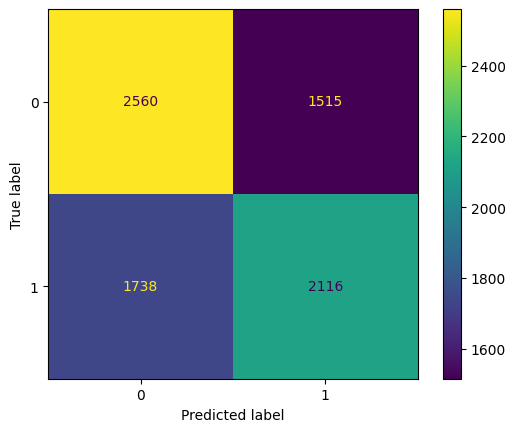

SVM:


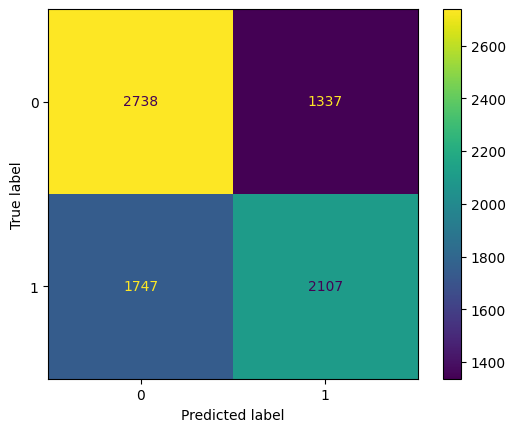

Decision Tree:


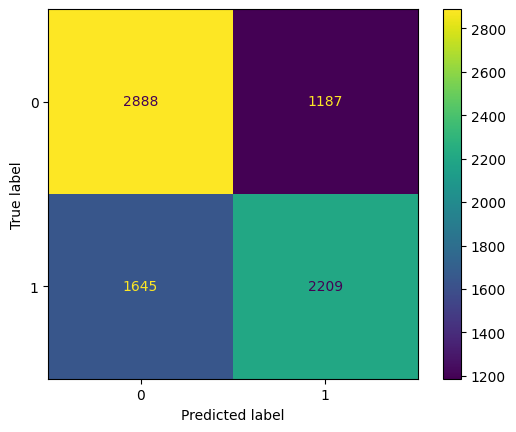

In [28]:
print("\nSummary of Findings:")
print(f"KNN best k: {best_k}, Accuracy: {accuracy_knn:.4f}")
print(f"SVM best C: {best_c}, Accuracy: {accuracy_svm:.4f}")
print(f"Decision Tree best parameters: {best_param_tree}, Accuracy: {accuracy_tree:.4f}")

# Using confusion Matrices to inlustrate data better
disp_knn = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn))
disp_svm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm))
disp_tree = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tree))

print("\nConfusion Matrices:")
print("KNN:")
disp_knn.plot()
plt.show()

print("SVM:")
disp_svm.plot()
plt.show()

print("Decision Tree:")
disp_tree.plot()
plt.show()

The method that worked the best was the Decision Tree with a higher accuracy when compared to KNN or SVM. Different parameters do influence the accuracy provided that not using the best k for KNN or best c for SVM the accuracy tends to drop and either under-fit or over-fit the model. The easiest model to interpret is the Decision Tree due to its strength in plotting the tree by a set of of decision rules that is straight forward and easy to visualize.

Top 3 features:
1.  kw_avg_avg - Importance 0.04438696220802742
2.  kw_max_avg - Importance 0.03867725989174367
3.  LDA_02 - Importance 0.032674556579185145


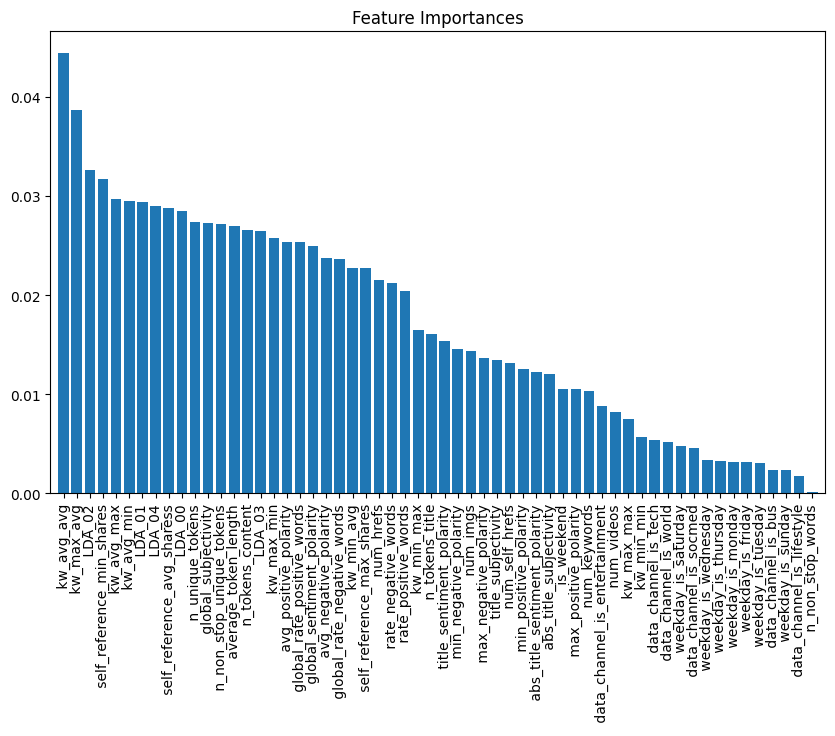

In [32]:
# I wanted to know the top 3 features that predict the number of shares the best
# to make a better interpretation of my experiments

# Using Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier

y = np.where(data[' shares'].to_numpy() > median_shares, 1, 0)

# '.values' returns numpy representation of the data
x = data.drop([' shares'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

features_importances = random_forest.feature_importances_
features = x.columns
indices = np.argsort(features_importances)[::-1]

print("Top 3 features:")
for i in range(3):
    print(f"{i+1}. {features[indices[i]]} - Importance {features_importances[indices[i]]}")

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), features_importances[indices], align='center')
plt.xticks(range(x.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

kw_avg_avg, kw_max_avg and LDA_02 seems to be most important features that affect shares/popularity.
- kw_avg_avg suggests that articles with certain keywords, on average, tend to perform better in terms of shares. This indicates that the presence and frequency of specific keywords in an article might significantly influence its popularity.
- kw_max_avg implies that the maximum performance of any single keyword in an article can be a strong predictor of its popularity. If an article contains a keyword that historically has performed exceptionally well, it is likely to receive more shares.
- LDA_02: This might mean that articles covering particular subjects or themes (captured by Topic 2 in the LDA model) resonate more with readers and are shared more frequently.
